In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
import librosa
from librosa import display
%matplotlib inline

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/yoga_82/train_keypoints_yoga82.csv")

In [ ]:
train.labels.value_counts()

6    274
4    240
8    189
3    162
5    158
7    135
2    123
1    111
0    110
Name: labels, dtype: int64

In [ ]:
x_train = train.drop(['file_name', 'labels'], axis=1)
y_train = train.labels

In [ ]:
y_train = y_train.astype('float64')

In [ ]:
y_train = keras.utils.to_categorical(y_train)

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/yoga_82/test_keypoints_yoga82.csv")

In [ ]:
test.labels.value_counts()

6    69
4    60
8    47
5    40
3    40
7    34
2    31
0    28
1    27
Name: labels, dtype: int64

In [ ]:
x_test = test.drop(['file_name', 'labels'], axis=1)
y_test = test.labels

In [ ]:
y_test = test.labels.astype('float64')

In [ ]:
y_test = keras.utils.to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense,Dropout,Activation
from sklearn import metrics
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1201, 99)
(1201, 9)
(376, 99)
(376, 9)


In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(99,)))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(9, activation='softmax'))
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               12800     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               33024     
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                16448     
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 9)                

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_path = "/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82.best_ann.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100)

In [ ]:
history = model.fit(x_train, y_train, epochs=200, batch_size = 32, validation_data=(x_val, y_val), callbacks=[checkpoint, earlystopping])

Epoch 1/200
32/38 [========================>.....] - ETA: 0s - loss: 2.1043 - accuracy: 0.2129
Epoch 1: val_accuracy improved from -inf to 0.32713, saving model to /content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82.best_ann.hdf5
38/38 [==============================] - 1s 11ms/step - loss: 2.0770 - accuracy: 0.2231 - val_loss: 1.7262 - val_accuracy: 0.3271
Epoch 2/200
31/38 [=======================>......] - ETA: 0s - loss: 1.7217 - accuracy: 0.3397
Epoch 2: val_accuracy improved from 0.32713 to 0.50798, saving model to /content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82.best_ann.hdf5
38/38 [==============================] - 0s 6ms/step - loss: 1.6976 - accuracy: 0.3539 - val_loss: 1.3356 - val_accuracy: 0.5080
Epoch 3/200
33/38 [=========================>....] - ETA: 0s - loss: 1.4122 - accuracy: 0.4432
Epoch 3: val_accuracy improved from 0.50798 to 0.61436, saving model to /content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82.best_ann

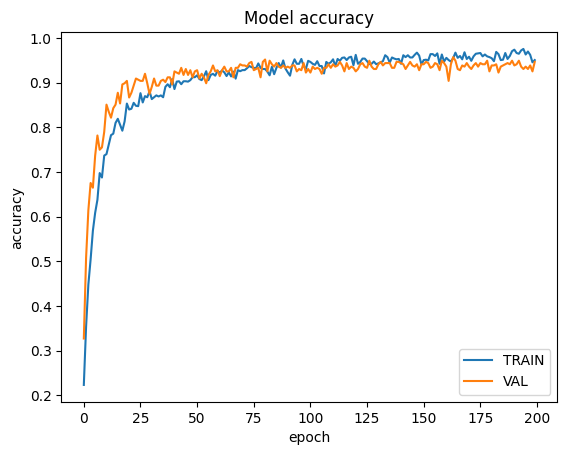

In [ ]:
# Visualize the training history to see whether you're overfitting.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()

In [ ]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82.best_ann.hdf5")

In [ ]:
model.evaluate(x_train, y_train)

38/38 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9892


[0.03281356394290924, 0.9891756772994995]

In [ ]:
model.evaluate(x_val, y_val)

10/10 [==============================] - 0s 3ms/step - loss: 0.2966 - accuracy: 0.9369


[0.2965967059135437, 0.9368770718574524]

In [ ]:
model.evaluate(x_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.1699 - accuracy: 0.9574


[0.16987432539463043, 0.957446813583374]

In [ ]:
y_pred = model.predict(x_test)

12/12 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[1.5905980e-04, 2.7238099e-12, 1.0165113e-09, ..., 5.3951953e-05,
        1.3029280e-09, 7.1480417e-06],
       [9.9998242e-01, 2.7958997e-15, 2.6757053e-14, ..., 8.5175014e-07,
        8.3202239e-13, 3.1598149e-09],
       [3.1557011e-08, 1.4470641e-14, 1.8834224e-10, ..., 9.9880761e-01,
        3.2054234e-10, 1.2917085e-10],
       ...,
       [5.6782456e-12, 8.5941809e-10, 9.9999982e-01, ..., 5.3366350e-10,
        5.1685536e-08, 1.6231500e-12],
       [6.1832389e-14, 9.9999577e-01, 4.2511136e-08, ..., 5.1628923e-10,
        7.7997512e-08, 2.6192888e-09],
       [4.3524989e-05, 3.2289098e-08, 5.1683378e-06, ..., 9.9530840e-01,
        6.0619340e-07, 1.8380491e-07]], dtype=float32)

In [ ]:
y_pred.shape

(376, 9)

In [ ]:
y_pred[0]

array([1.5905980e-04, 2.7238099e-12, 1.0165113e-09, 2.8649713e-10,
       9.9977946e-01, 3.7712152e-07, 5.3951953e-05, 1.3029280e-09,
       7.1480417e-06], dtype=float32)

In [ ]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([4, 0, 6, 0, 5, 4, 3, 6, 6, 3, 5, 6, 1, 3, 8, 0, 3, 3, 5, 6, 7, 6,
       2, 0, 6, 6, 4, 6, 3, 6, 5, 6, 6, 8, 4, 4, 3, 0, 6, 4, 6, 6, 4, 6,
       4, 0, 4, 2, 4, 2, 8, 2, 8, 6, 0, 1, 7, 8, 6, 7, 7, 8, 4, 4, 6, 3,
       5, 3, 0, 4, 7, 2, 6, 4, 3, 3, 3, 8, 2, 7, 8, 7, 2, 1, 8, 3, 7, 7,
       5, 6, 7, 5, 8, 4, 1, 7, 6, 5, 0, 5, 4, 4, 5, 0, 0, 4, 0, 8, 1, 6,
       6, 4, 5, 6, 4, 1, 8, 6, 5, 8, 2, 3, 2, 3, 6, 6, 7, 6, 1, 4, 6, 6,
       7, 1, 8, 8, 4, 2, 6, 7, 5, 6, 0, 8, 2, 2, 3, 0, 5, 8, 4, 5, 5, 8,
       8, 4, 8, 8, 6, 0, 0, 1, 2, 7, 0, 7, 8, 5, 7, 6, 0, 7, 8, 6, 4, 4,
       5, 7, 2, 6, 8, 2, 4, 5, 8, 4, 6, 0, 5, 4, 7, 6, 4, 5, 6, 8, 8, 6,
       6, 6, 3, 7, 7, 4, 3, 6, 8, 2, 6, 4, 0, 6, 2, 6, 8, 8, 8, 7, 0, 4,
       0, 8, 6, 6, 1, 6, 5, 5, 1, 4, 4, 0, 6, 0, 5, 5, 5, 2, 3, 6, 2, 8,
       8, 2, 8, 1, 2, 6, 3, 3, 2, 7, 6, 4, 3, 7, 8, 1, 6, 3, 0, 8, 2, 5,
       1, 7, 3, 4, 8, 8, 8, 5, 7, 0, 7, 6, 6, 8, 3, 7, 2, 4, 4, 7, 8, 6,
       4, 8, 1, 6, 6, 5, 2, 1, 6, 6, 3, 6, 1, 1, 0,

In [ ]:
pose_test = [None] * y_test.size
pose_pred = [None] * y_pred.size

for i in range(len(y_test)):
    if(y_test[i]==0): pose_test[i] = 'Plank'           
    if(y_test[i]==1): pose_test[i] = 'Warrior_I'       
    if(y_test[i]==2): pose_test[i] = 'Standing_big_toe'     
    if(y_test[i]==3): pose_test[i] = 'Warrior_II'         
    if(y_test[i]==4): pose_test[i] = 'Cat_Cow'         
    if(y_test[i]==5): pose_test[i] = 'Child'            
    if(y_test[i]==6): pose_test[i] = 'Cobra'     
    if(y_test[i]==7): pose_test[i] = 'Tree'              
    if(y_test[i]==8): pose_test[i] = 'Downward-Facing_Dog'

for i in range(len(y_pred)):
    if(y_pred[i]==0): pose_pred[i] = 'Plank'                           
    if(y_pred[i]==1): pose_pred[i] = 'Warrior_I'                   
    if(y_pred[i]==2): pose_pred[i] = 'Standing_big_toe'     
    if(y_pred[i]==3): pose_pred[i] = 'Warrior_II'                      
    if(y_pred[i]==4): pose_pred[i] = 'Cat_Cow'                                              
    if(y_pred[i]==5): pose_pred[i] = 'Child'                                 
    if(y_pred[i]==6): pose_pred[i] = 'Cobra'                              
    if(y_pred[i]==7): pose_pred[i] = 'Tree'                                    
    if(y_pred[i]==8): pose_pred[i] = 'Downward-Facing_Dog'     

In [ ]:
confusion_matrix(pose_test, pose_pred)

array([[55,  0,  2,  2,  1,  0,  0,  0,  0],
       [ 0, 39,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 67,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  1, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  1,  0,  0],
       [ 0,  0,  0,  1,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 26,  0],
       [ 0,  0,  1,  0,  0,  0,  1,  1, 37]])

In [ ]:
! pip install -q scikit-plot

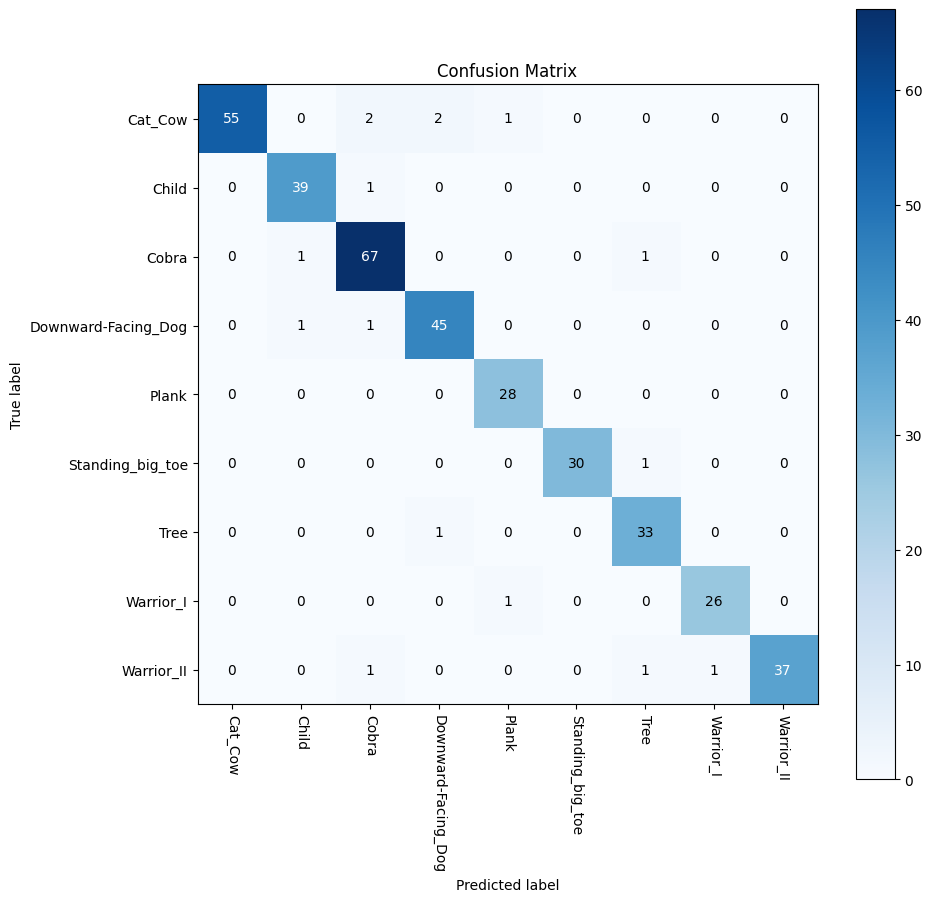

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(pose_test, pose_pred, figsize=(10,10))

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=270)
plt.show()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1_score(pose_test, pose_pred, average='weighted')

0.95754147360887

In [ ]:
precision_score(pose_test, pose_pred, average='weighted')

0.9590947176094101

In [ ]:
recall_score(pose_test, pose_pred, average='weighted')

0.9574468085106383

In [ ]:
from sklearn.metrics import f1_score

# Convert pose_val and pose_pred to numpy arrays
nppose_val = np.array(pose_test)
nppose_pred = np.array(pose_pred)

# Get a list of all unique labels
labels = np.unique(nppose_val)

# Calculate F1 score for each label
for label in labels:
    # Create a binary array indicating if the label matches the current label
    y_true = (nppose_val == label)
    y_pred = (nppose_pred == label)
    
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)
    
    # Print the F1 score for the current label
    print(f"F1 score for {label}: {f1}")


F1 score for Cat_Cow: 0.9565217391304348
F1 score for Child: 0.9629629629629629
F1 score for Cobra: 0.9503546099290779
F1 score for Downward-Facing_Dog: 0.9473684210526315
F1 score for Plank: 0.9655172413793104
F1 score for Standing_big_toe: 0.9836065573770492
F1 score for Tree: 0.9428571428571428
F1 score for Warrior_I: 0.9629629629629629
F1 score for Warrior_II: 0.961038961038961
